# importing neccessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# loading and understanding the dataset

In [14]:
df = pd.read_csv(r"C:\Users\hemasatish\Downloads\credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [16]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### we can see that columns  'person_emp_length', 'loan_int_rate' are havimg null values                         

In [17]:
df[['person_emp_length','loan_int_rate']]

,person_emp_length,loan_int_rate
0,123.0,16.02
1,5.0,11.14
2,1.0,12.87
3,4.0,15.23
4,8.0,14.27
...,...,...
32576,1.0,13.16
32577,4.0,7.49
32578,3.0,10.99
32579,5.0,11.48


# Treating null values

In [18]:
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace = True)

C:\Users\hemasatish\AppData\Local\Temp\ipykernel_3040\2671433165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace = True)


In [19]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [20]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace = True)

C:\Users\hemasatish\AppData\Local\Temp\ipykernel_3040\3436135235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace = True)


In [21]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# descriptive statistics

In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [12]:
df.describe(include = object)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


# Univariate Analysis 

Understanding the distribution of numerical columns 

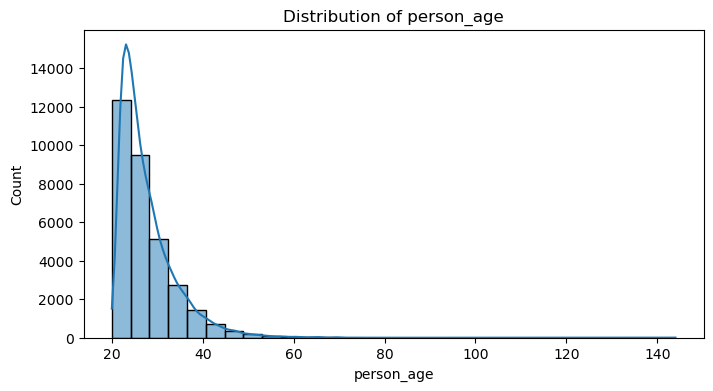

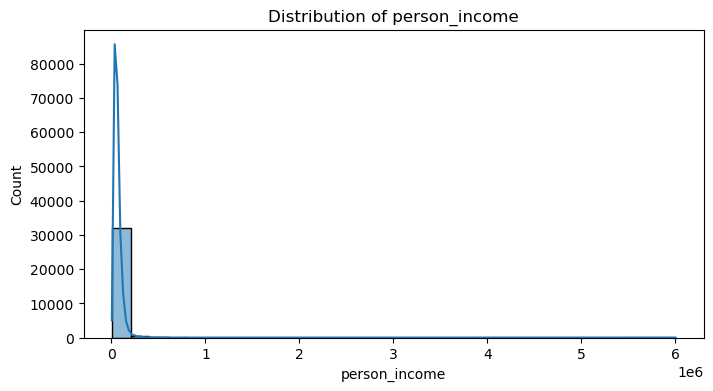

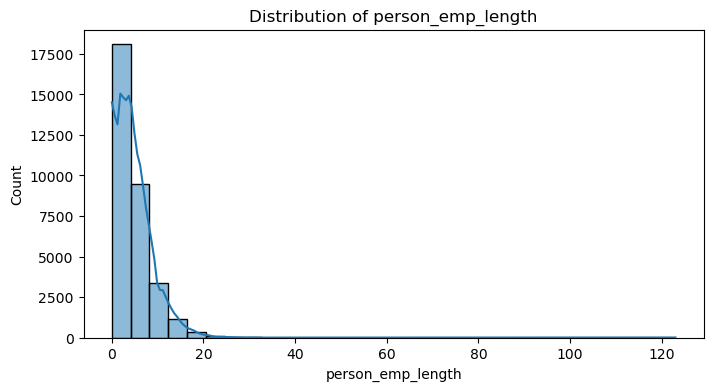

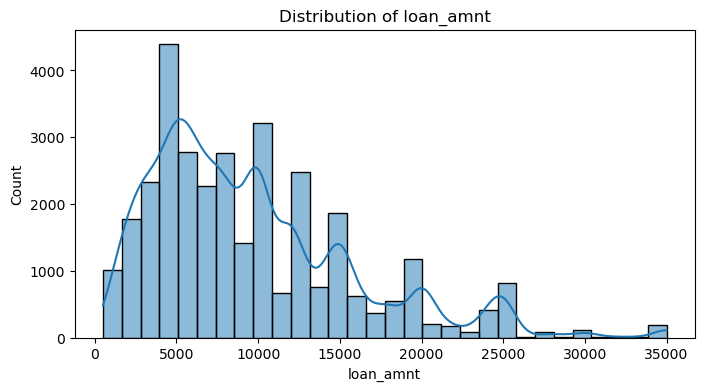

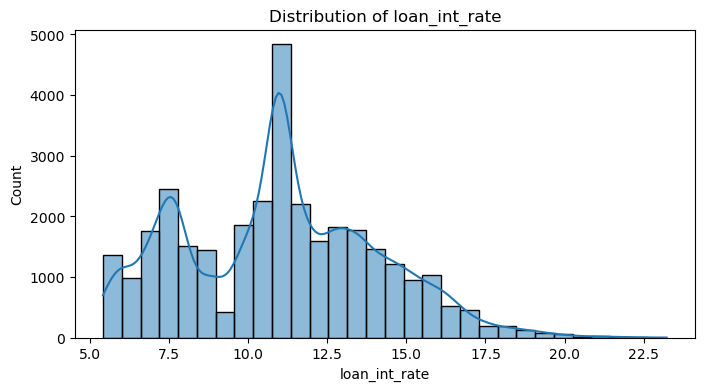

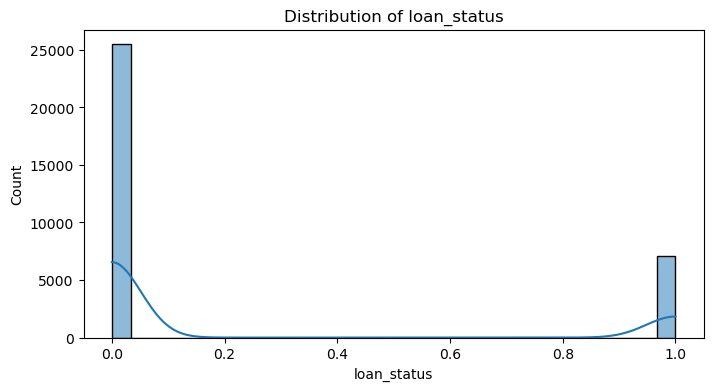

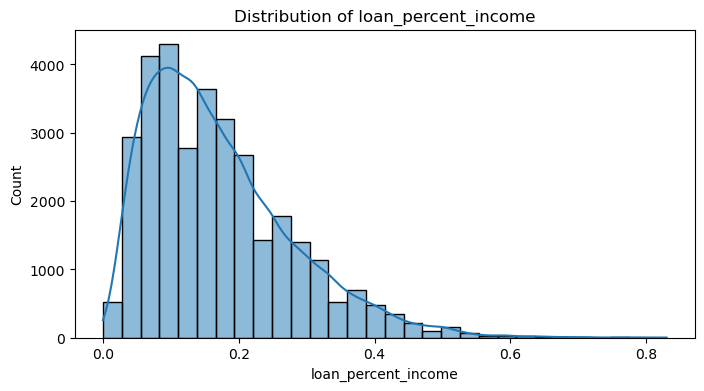

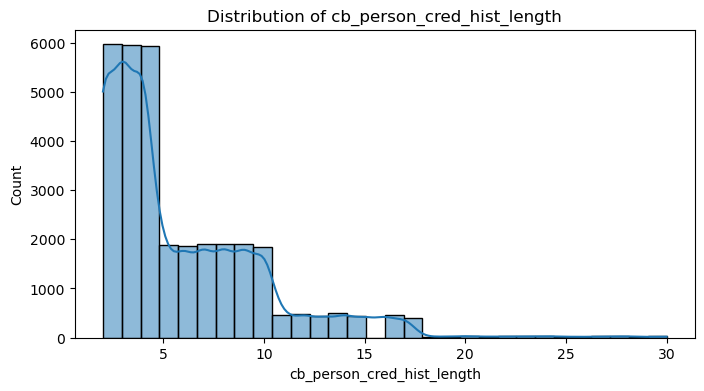

In [24]:
numerical_columns = df.select_dtypes(include=np.number).columns

for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

##### Understanding the distribution of categorical columns

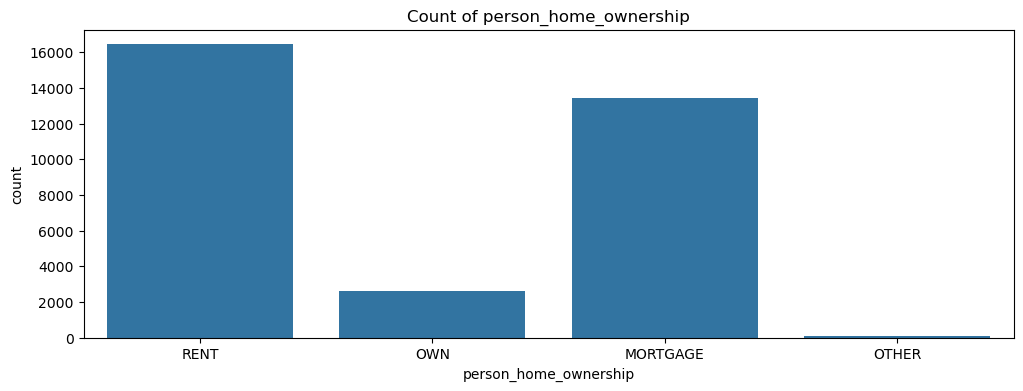

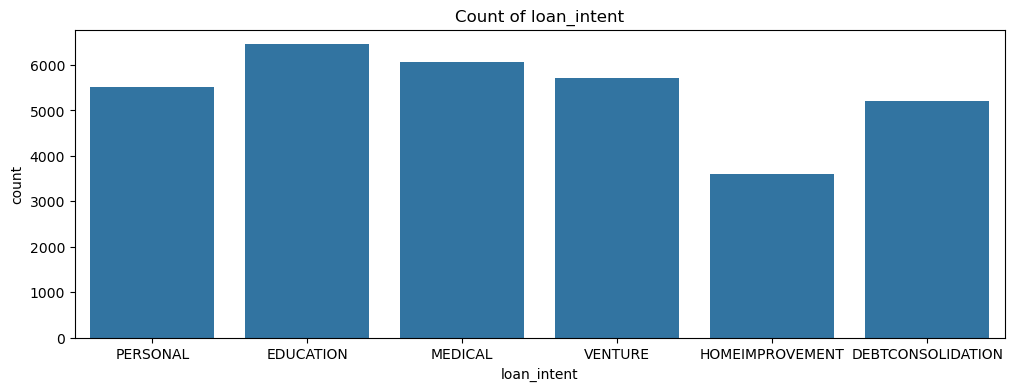

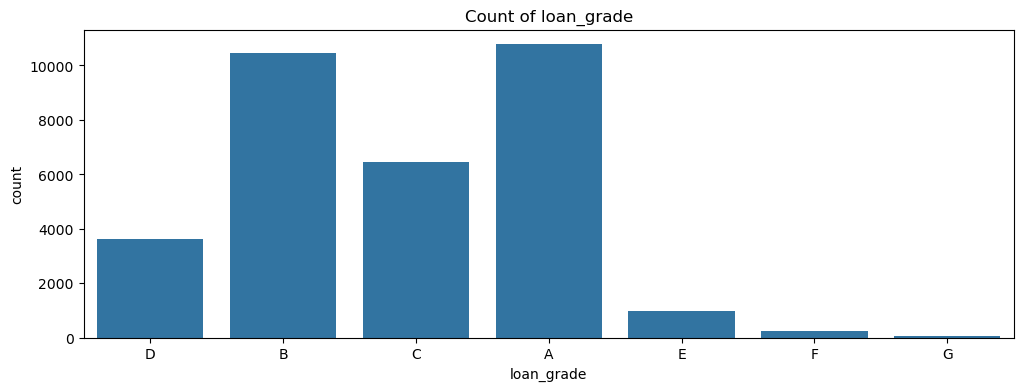

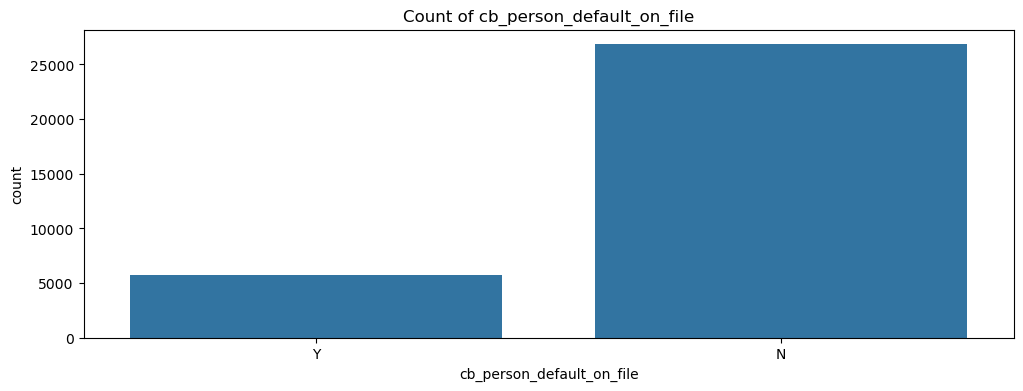

In [30]:
categorical_columns = df.select_dtypes(exclude=np.number).columns

for col in categorical_columns:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    #plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis (Target Variable vs Others)

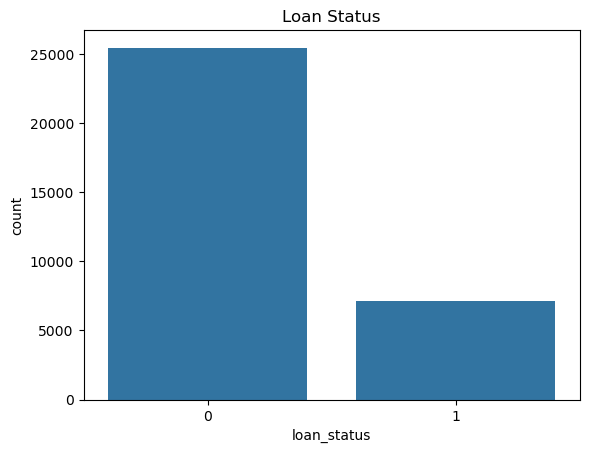

loan_status
0    78.18
1    21.82
Name: proportion, dtype: float64


In [34]:
sns.countplot(data=df, x='loan_status')
plt.title("Loan Status")
plt.show()

value = df['loan_status'].value_counts(normalize=True)*100
print(value.round(2))

### understanding the distribution target_varibale with numerical columns

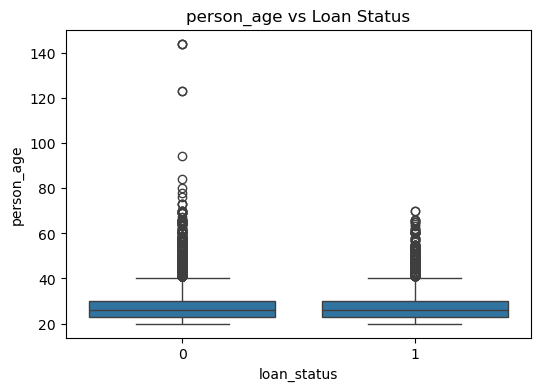

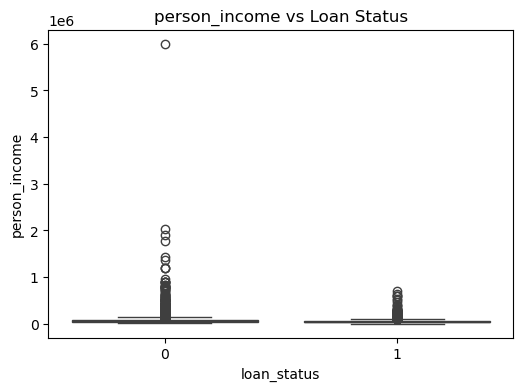

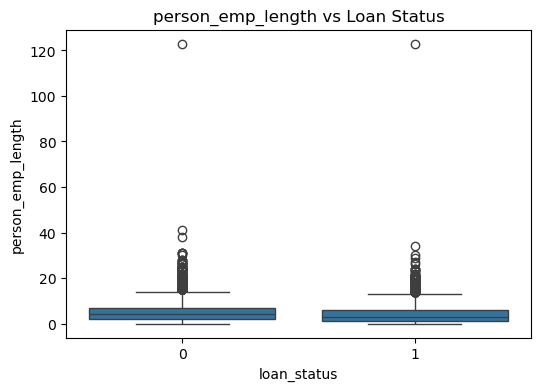

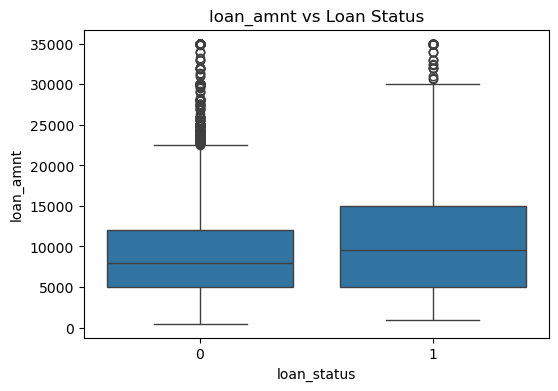

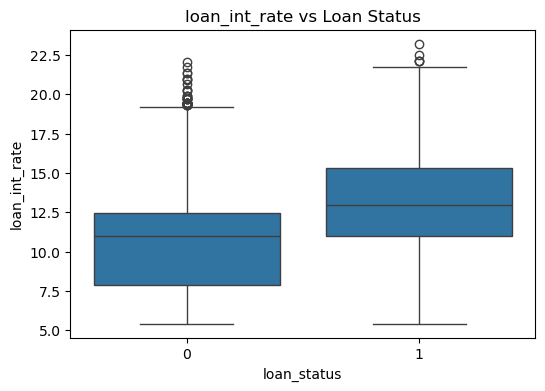

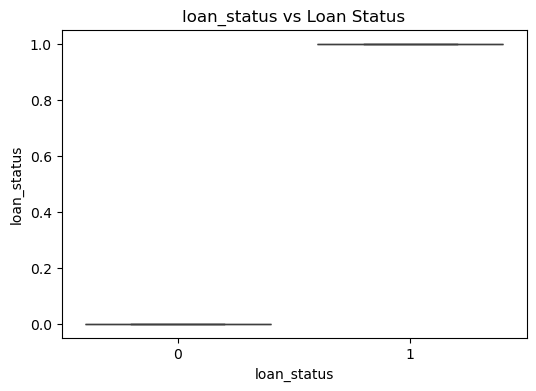

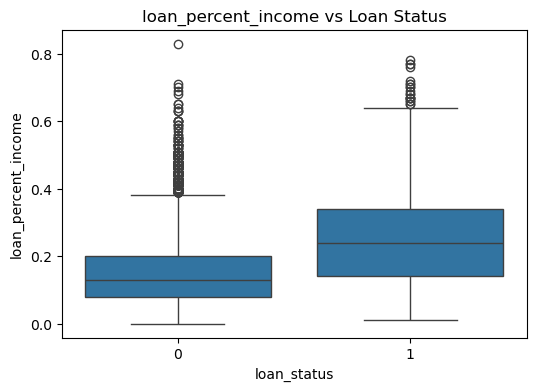

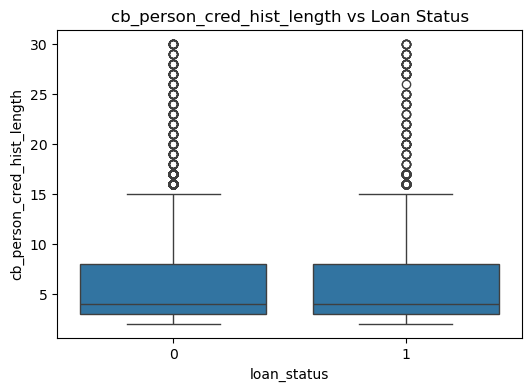

In [39]:
num_cols = df.select_dtypes(include = np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs Loan Status")
    plt.show()

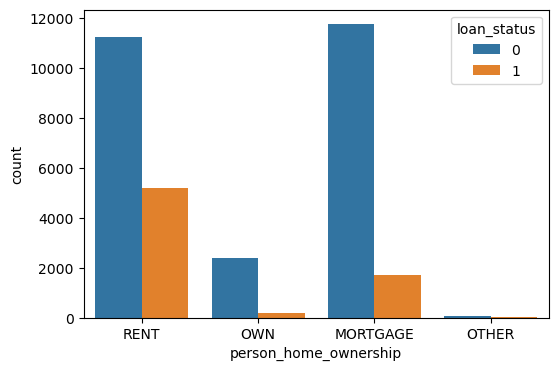

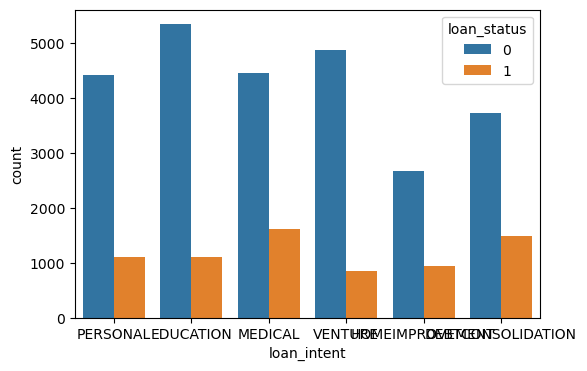

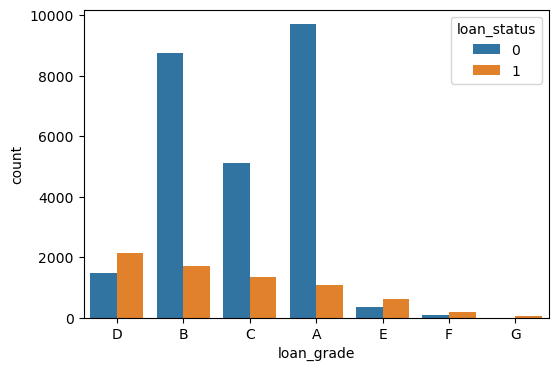

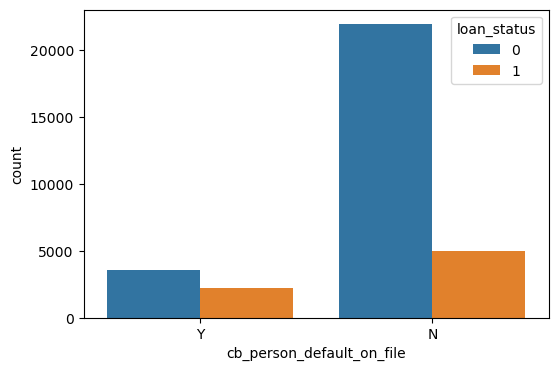

In [44]:
cat_cols = df.select_dtypes(exclude = np.number).columns

for i in cat_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(data = df, x = i, hue = 'loan_status')
    plt.show()

# Final insights and recommendations

1) People who are taking loans are mostly in the age group of 20 to 30
2) The average loan interset rate is around 10 to 12.5
3) People are taking more loans on education and medical followed by persoinal loans
4) Almost 78% of loans are got cleared and remains 22% of loans
5) Before sanctioning the loans it is neccessary that there is proper verification done on canididata income and previous loans